In [2]:
import zipfile

with zipfile.ZipFile("digit-recognizer.zip", 'r') as zip_ref:
    zip_ref.extractall("digit_data")


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [7]:
train = pd.read_csv("digit_data/train.csv")

In [8]:
train.shape

(42000, 785)

In [ ]:
X_train = train.iloc[:, 1:].values.reshape(1, 28, 28, 1) / 255.0 
y_train = to_categorical(train.iloc[:, 0], num_classes=10)

In [10]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (42000, 28, 28, 1)
y_train shape: (42000, 10)


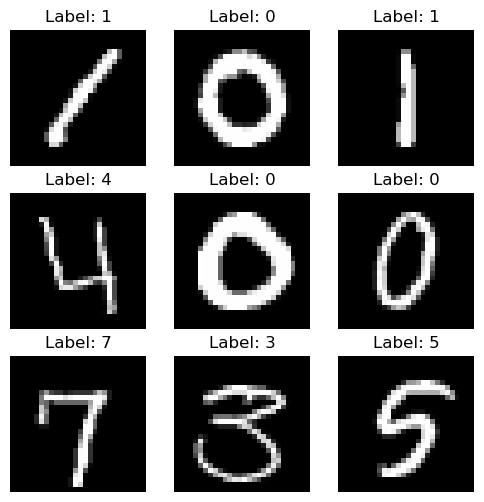

In [ ]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()+


In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

c:\Users\HP\anaconda3\anaconda34\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8753 - loss: 0.4007 - val_accuracy: 0.9717 - val_loss: 0.0952
Epoch 2/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9625 - loss: 0.1249 - val_accuracy: 0.9760 - val_loss: 0.0667
Epoch 3/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9721 - loss: 0.0920 - val_accuracy: 0.9824 - val_loss: 0.0536
Epoch 4/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9774 - loss: 0.0726 - val_accuracy: 0.9840 - val_loss: 0.0459
Epoch 5/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9818 - loss: 0.0596 - val_accuracy: 0.9869 - val_loss: 0.0400


In [17]:
final_accuracy = history.history['val_accuracy'][-1]
print(f"Accuracy: {final_accuracy:.4f}")

Accuracy: 0.9869


In [18]:
model.save("digit_cnn_model.h5")
print("Model saved as digit_cnn_model.h5")

Model saved as digit_cnn_model.h5
